# Predict - Python Data Structures

This is the project on Python Data Structures. We will start by transforming the raw data for you. You then need to create 9 functions as specified in the project instructions.

NB: Make sure the football_players.csv file is in the same directory as this notebook

**PROJECT RULES**:

* You may not import any external packages (except for pandas) - all of the functions need to be solved WITHOUT THE USE OF ANY OTHER EXTERNAL MODULES.
* Most importantly: your functions need to return the answer (not just print it out).
* Do not add or remove any cells from this notebook. Use another notebook to experiment in (or in which to do your workings), but your submission may not have any additional cells or functions.
* Only fill in code where the #YOUR CODE tags appear. No code outside these areas (or outside the given functions) will be marked.

## Transform Data

### Import Data

In [23]:
import pandas as pd

# Load data - pass 'Name' as our index column
load_df = pd.read_csv('football_players.csv', index_col='Name').sample(frac=1)

# Create dataframe called df
df = pd.DataFrame(load_df)

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (14,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
#Visualisation packages
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
import pylab 
import datetime

### Create Position Type Column

In [24]:
def position_type(s):
    
    """This function converts the individual positions (abbreviations) and classfies it
    as either a forward, midfielder, back or goal keeper"""
    
    if (s[-2] == 'T') | (s[-2] == 'W'):
        return 'Forward'
    elif s[-2] == 'M':
        return 'Midfielder'
    elif s[-2] == 'B':
        return 'Back'
    else:
        return 'GoalKeeper'

# Create position type column
df['PreferredPositionsType'] = df['Preferred Positions'].apply(position_type)

### Transform Attribute Columns to Floats and Rename Colums with Spaces

In [25]:
# Select all attribute columns
cols = ['Overall', 'Acceleration', 'Aggression',
       'Agility', 'Balance', 'Ball control', 'Composure', 'Crossing', 'Curve',
       'Dribbling', 'Finishing', 'Free kick accuracy', 'GK diving',
       'GK handling', 'GK kicking', 'GK positioning', 'GK reflexes',
       'Heading accuracy', 'Interceptions', 'Jumping', 'Long passing',
       'Long shots', 'Marking', 'Penalties', 'Positioning', 'Reactions',
       'Short passing', 'Shot power', 'Sliding tackle', 'Sprint speed',
       'Stamina', 'Standing tackle', 'Strength', 'Vision', 'Volleys']

def to_float(x):    
    "Transforms attribute columns to type float"
    
    if type(x) is int:
        return float(x)
    else:
        return float(x[0:2])

df[cols] = df[cols].applymap(to_float)

In [26]:
df.rename(columns={"Ball control": "BallControl", "Free kick accuracy": "FreeKickAccuracy","GK diving":"GKDiving","GK handling":"GKHandling","GK kicking":"GKKicking","GK positioning":"GKPositioning","GK reflexes":"GKReflexes","Heading accuracy":"HeadingAccuracy","Long passing":"LongPassing","Long shots":"LongShots","Short passing":"ShortPassing","Shot power":"ShotPower","SlidingTackle":"SlidingTackle","Sprint speed":"SprintSpeed","Standing tackle":"StandingTackle","Sliding tackle":"SlidingTackle","Preferred Positions":"PreferredPositions","Preferred Positions Type":"PreferredPostionsType"})

,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,BallControl,Composure,Crossing,...,ShotPower,SlidingTackle,SprintSpeed,Stamina,StandingTackle,Strength,Vision,Volleys,PreferredPositions,PreferredPositionsType
Name,,,,,,,,,,,,,,,,,,,,,
D. Andrew,26,England,65.000,73.000,50.000,63.000,59.000,61.000,58.000,71.000,...,66.000,63.000,70.000,71.000,62.000,66.000,60.000,40.000,CB LB,Back
F. Gytkjær,24,Denmark,62.000,67.000,39.000,67.000,64.000,66.000,54.000,51.000,...,59.000,34.000,66.000,59.000,29.000,63.000,51.000,40.000,CAM ST,Forward
B. Ketkeophomphone,27,France,76.000,82.000,35.000,83.000,72.000,78.000,72.000,76.000,...,74.000,18.000,81.000,70.000,16.000,59.000,71.000,68.000,RM ST,Forward
J. O'Connell,23,England,66.000,60.000,55.000,49.000,46.000,49.000,44.000,49.000,...,41.000,62.000,53.000,64.000,68.000,83.000,27.000,30.000,LB CB,Back
C. Moţi,32,Romania,69.000,66.000,84.000,58.000,55.000,55.000,51.000,58.000,...,33.000,65.000,63.000,69.000,73.000,74.000,35.000,36.000,RB CB,Back
A. Al Shamekh,24,Saudi Arabia,64.000,83.000,56.000,78.000,67.000,61.000,35.000,65.000,...,26.000,59.000,80.000,76.000,63.000,61.000,32.000,26.000,LB,Back
J. Lucumi,22,Colombia,71.000,80.000,64.000,78.000,72.000,72.000,68.000,62.000,...,68.000,27.000,82.000,69.000,23.000,46.000,64.000,55.000,CAM,Midfielder
T. Souček,22,Czech Republic,70.000,56.000,74.000,51.000,48.000,63.000,64.000,52.000,...,71.000,67.000,55.000,75.000,68.000,76.000,62.000,54.000,CDM,Midfielder
Rodrigo Tarín,20,Spain,67.000,69.000,73.000,60.000,54.000,55.000,56.000,21.000,...,59.000,63.000,72.000,57.000,68.000,73.000,42.000,29.000,CDM RB CB,Back


In [51]:
def Confed(s):
    
    """This function converts the individual nationalities and classfies it
    as part of the confederation it is part of"""
    
    if s == Asia:
        return 'AFC'
    elif s == Africa:
        return 'CAF'
    elif s == Americas:
        return 'Concacaf'
    elif s == SouthAmerica:
        return 'Conmebol'
    elif s == Pacific:
        return 'OFC'
    else:
        return 'Europe'

# Create position type column
df['Confederation'] = df['Nationality'].apply(Confed)

## Exploratory Data Analysis
The below functions are to look at the csv and assist with EDA. These functions can be performed in SQL SSMS with ML activated.

In [52]:
def stats(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [50]:
details = stats(df, 'Overall')
display(details.sort_values(by='corr Overall', ascending=False))

Data shape: (17981, 40)
___________________________
Data types:
 float64    35
object      4
int64       1
Name: types, dtype: int64
___________________________


,types,counts,distincts,nulls,missing_ration,uniques,skewness,kurtosis,corr Overall
Overall,float64,17981,49,0,0.000,"[[65.0, 62.0, 76.0, 66.0, 69.0, 64.0, 71.0, 70...",0.006,-0.008,1.000
Reactions,float64,17981,78,0,0.000,"[[64.0, 58.0, 77.0, 62.0, 71.0, 53.0, 63.0, 69...",-0.294,0.530,0.820
Composure,float64,17981,85,0,0.000,"[[58.0, 54.0, 72.0, 44.0, 51.0, 35.0, 68.0, 64...",-0.714,0.433,0.624
Short passing,float64,17981,83,0,0.000,"[[64.0, 62.0, 76.0, 51.0, 55.0, 68.0, 69.0, 58...",-1.040,0.548,0.483
Vision,float64,17981,84,0,0.000,"[[60.0, 51.0, 71.0, 27.0, 35.0, 32.0, 64.0, 62...",-0.354,-0.392,0.476
Long passing,float64,17981,85,0,0.000,"[[65.0, 57.0, 72.0, 32.0, 62.0, 43.0, 60.0, 64...",-0.558,-0.483,0.472
Age,int64,17981,29,0,0.000,"[[26, 24, 27, 23, 32, 22, 20, 30, 36, 29, 25, ...",0.390,-0.465,0.460
Ball control,float64,17981,88,0,0.000,"[[61.0, 66.0, 78.0, 49.0, 55.0, 72.0, 63.0, 42...",-1.202,0.791,0.449
Shot power,float64,17981,88,0,0.000,"[[66.0, 59.0, 74.0, 41.0, 33.0, 26.0, 68.0, 71...",-0.689,-0.346,0.427
Curve,float64,17981,86,0,0.000,"[[62.0, 47.0, 71.0, 31.0, 39.0, 68.0, 37.0, 49...",-0.243,-0.757,0.413


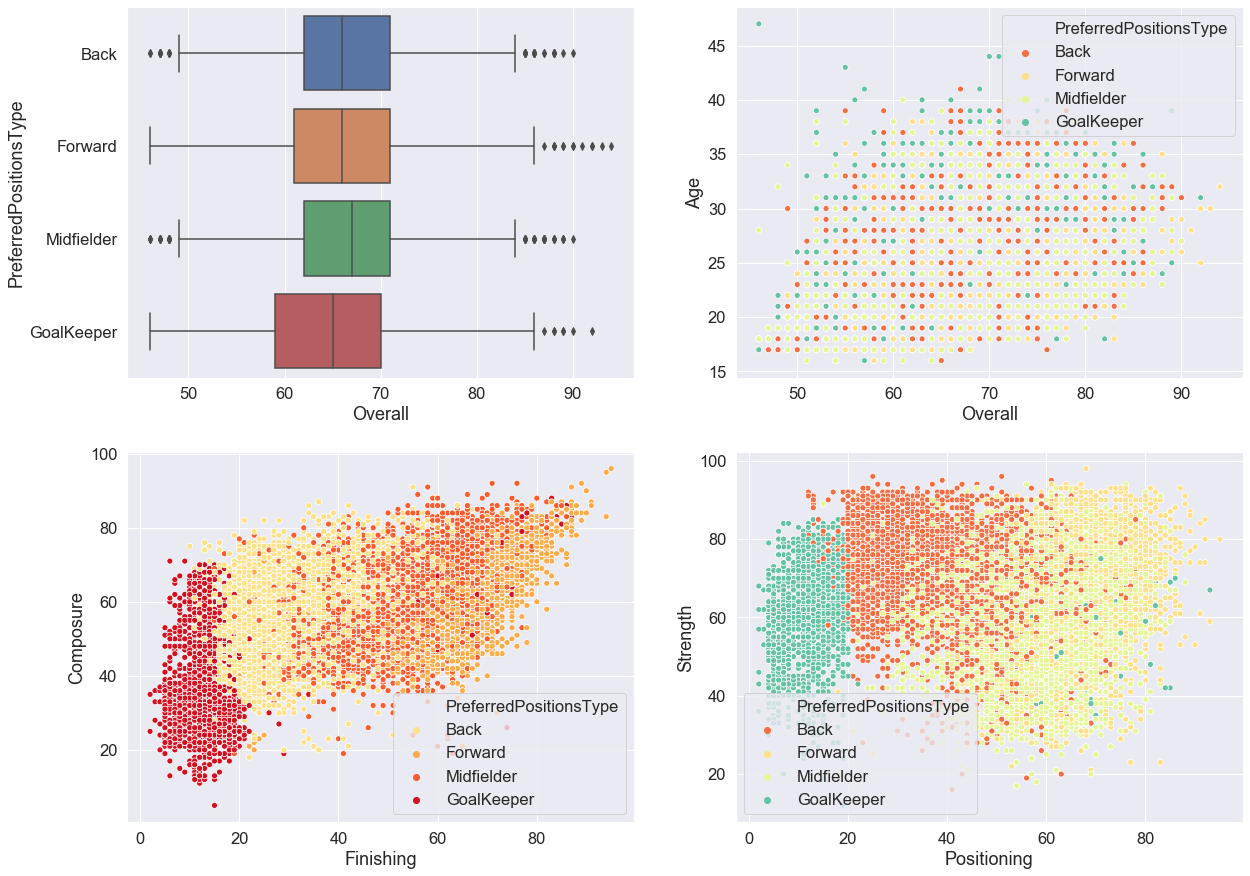

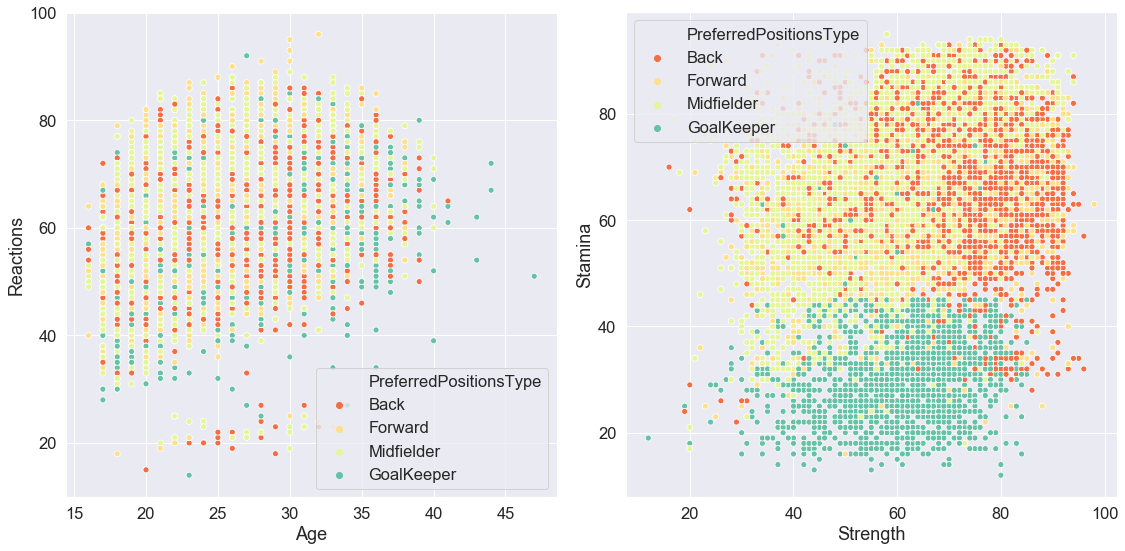

In [38]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

# (Corr= 0.817185) Box plot overallqual/salePrice
fig1 = fig.add_subplot(221); sns.boxplot(x='Overall', y='PreferredPositionsType', data=df[['Overall', 'PreferredPositionsType']])

# (Corr= 0.700927) GrLivArea vs SalePrice plot
fig2 = fig.add_subplot(222); 
sns.scatterplot(x = df.Overall, y = df.Age, hue=df.PreferredPositionsType, palette= 'Spectral')

# (Corr= 0.680625) GarageCars vs SalePrice plot
fig3 = fig.add_subplot(223); 
sns.scatterplot(x = df.Finishing, y = df.Composure, hue=df.PreferredPositionsType, palette= 'YlOrRd')

# (Corr= 0.650888) GarageArea vs SalePrice plot
fig4 = fig.add_subplot(224); 
sns.scatterplot(x = df.Positioning, y = df.Strength, hue=df.PreferredPositionsType, palette= 'Spectral')

fig5 = plt.figure(figsize=(16, 8))
fig6 = fig5.add_subplot(121); 
sns.scatterplot(y = df.Reactions , x = df.Age, hue=df.PreferredPositionsType, palette= 'Spectral')

fig7 = fig5.add_subplot(122); 
sns.scatterplot(y = df.Stamina, x = df['Strength'], hue=df.PreferredPositionsType, palette= 'Spectral')

plt.tight_layout(); plt.show()

66.000    1105
67.000    1072
64.000    1056
68.000    1033
65.000    1015
63.000     917
69.000     908
70.000     905
71.000     841
62.000     814
72.000     715
60.000     689
61.000     681
73.000     676
74.000     579
59.000     501
58.000     456
75.000     454
57.000     377
76.000     370
56.000     314
77.000     293
55.000     288
54.000     255
78.000     230
53.000     227
79.000     175
52.000     174
51.000     131
80.000     127
50.000     115
82.000     101
81.000      93
83.000      71
49.000      49
84.000      35
85.000      23
48.000      23
86.000      23
47.000      16
88.000      14
87.000      13
46.000       8
89.000       8
90.000       5
92.000       3
93.000       1
94.000       1
91.000       1
Name: Overall, dtype: int64


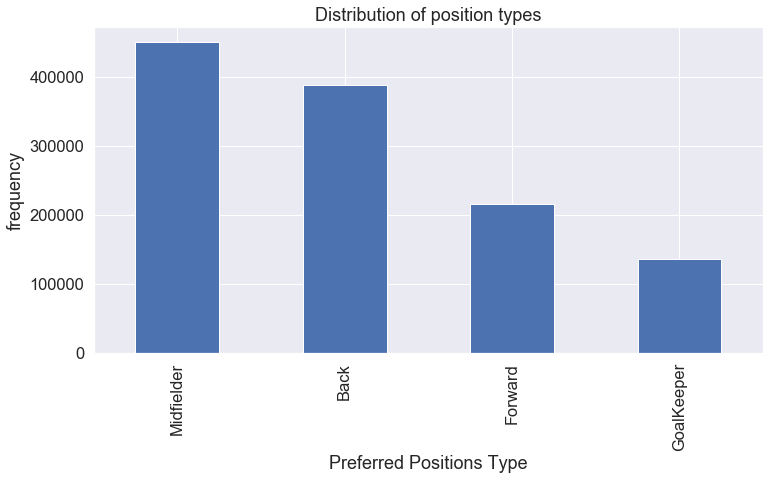

In [16]:
print(df.Overall.value_counts())

fig = plt.figure(figsize=(12,6))
plt.title('Distribution of position types')
plt.ylabel('frequency')
df.groupby('Preferred Positions Type')['Overall'].sum().sort_values(ascending=False).plot(kind='bar')

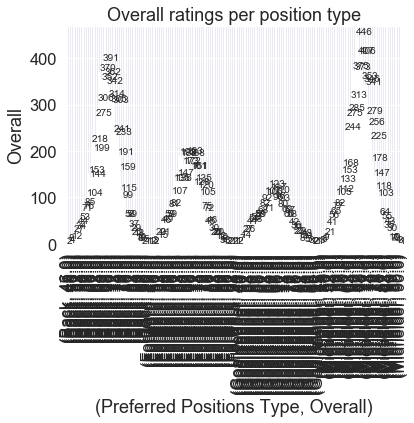

In [14]:
df['OverallPositions'] = df.Overall / df.PreferredPositionsType
# df.drop(['TotalArea', 'SalePrice'], axis=1, inplace=True)

# Fill the gaps
df = df.append(pd.DataFrame([['NPkVill', 2006, df.OverallPositions[df.Neighborhood=='NPkVill'].mean()]], 
                            columns=df.columns))

df = df.append(pd.DataFrame([['Veenker', 2009, df.OverallPositions[df.Neighborhood=='Veenker'].mean()]], 
                            columns=df.columns))

df = df.append(pd.DataFrame([['Veenker', 2010, df.OverallPositions[df.Neighborhood=='Veenker'].mean()]], 
                            columns=df.columns))

df = df.append(pd.DataFrame([['Blueste', 2006, df.OverallPositions[df.Neighborhood=='Blueste'].min()]], 
                            columns=df.columns))

df = df.append(pd.DataFrame([['Blueste', 2007, df.OverallPositions[df.Neighborhood=='Blueste'].min()]], 
                            columns=df.columns))

df = df.append(pd.DataFrame([['Blueste', 2010, df.OverallPositions[df.Neighborhood=='Blueste'].max()]], 
                            columns=df.columns))

# Reserve data to merge with all data set of train and test data
YearlyPrice = df
YearlyPrice.columns = ['Neighborhood', 'YrSold', 'YearlyPriceByNeighborhood']

print('                              Yearly Sales Prices per Area (Constructed + Lot) by Neighborhood:')
g = sns.catplot(y= 'YearlyPriceByNeighborhood', x = 'YrSold', col='Neighborhood', data=YearlyPrice, 
               kind="point", aspect=.6, col_wrap=7, height=4, col_order=Neig.index)

In [39]:
Asia = ['Afghanistan',
'Australia',
'Bahrain',
'Bangladesh',
'Bhutan',
'Brunei', 'Darussalam',
'Cambodia',
'China',
'Chinese Taipei',
'Guam',
'Hong Kong',
'India',
'Indonesia',
'Iran',
'Iraq',
'Japan',
'Jordan',
'Korea DPR',
'Korea Republic',
'Kuwait',
'Kyrgyz Republic',
'Laos',
'Lebanon',
'Macau',
'Malaysia',
'Maldives',
'Mongolia',
'Myanmar',
'Nepal',
'Northern Mariana Islands',
'Oman',
'Pakistan',
'Palestine',
'Philippines',
'Qatar',
'Saudi Arabia',
'Singapore',
'Sri Lanka',
'Syria',
'Tajikistan',
'Thailand',
'Timor-Leste',
'Turkmenistan',
'United Arab Emirates',
'Uzbekistan',
'Vietnam',
'Yemen']

In [41]:
Africa = [ 'Algeria','Angola','Benin', 'Botswana', 'Burkina Faso', ' Burundi', ' Cameroon', ' Cape Verde',' Central African Republic',
 'Chad',
 'Comoros',
 'Congo',
 'Congo DR',
 "Côte d'Ivoire",
 'Djibouti',
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Eswatini',
 'Ethiopia',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Kenya',
 'Lesotho',
 'Liberia',
 'Libya',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Réunion',
 'Rwanda'
 'São Tomé and Príncipe',
 'Senegal',
 'Seychelles',
 'Sierra Leone',
 'Somalia',
 'South Africa',
 'South Sudan',
 'Sudan',
 'Tanzania',
 'Togo',
 'Tunisia',
 'Uganda',
 'Zambia',
 'Zanzibar',
 'Zimbabwe']

In [43]:
Americas = [
 'Anguilla',
 'Antigua and Barbuda',
 'Aruba',
 'Bahamas',
 'Barbados',
 'Belize',
 'Bermuda',
 'Bonaire',
 'British Virgin Islands',
 'Canada',
 'Cayman Islands',
 'Costa Rica',
 'Cuba',
 'Curaçao',
 'Dominica',
' Dominican Republic',
' El Salvador',
 'French Guiana',
 'Grenada',
 'Guadeloupe',
 'Guatemala',
 'Guyana',
 'Haiti',
 'Honduras',
 'Jamaica',
 'Martinique',
 'Mexico',
 'Montserrat',
 'Nicaragua',
 'Panama',
 'Puerto Rico',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Martin',
 'Saint Vincent and the Grenadines',
 'Sint Maarten',
 'Suriname',
 'Trinidad and Tobago',
 'Turks and Caicos Islands',
 'United States',
 'US Virgin Islands']

In [44]:
SouthAmerica = [ 'Argentina',
 'Bolivia',
 'Brazil',
 'Chile',
 'Colombia',
 'Ecuador',
 'Paraguay',
 'Peru',
 'Uruguay',
 'Venezuela']

In [46]:
Pacific = [ 'American Samoa',
' Cook Islands',
' Fiji',
 'Kiribati',
' New Caledonia',
 'New Zealand',
 'Niue', 'Papua New Guinea',
 'Samoa',
 'Solomon Islands',
 'Tahiti',
 'Tonga',
 'Tuvalu',
 'Vanuatu']

In [47]:
Europe = [ 'Albania',
 'Andorra',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
' Bosnia and Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'England',
 'Estonia',
 'Faroe Islands',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Gibraltar',
 'Greece',
 'Hungary',
 'Iceland',
 'Israel',
 'Italy',
 'Kazakhstan',
 'Kosovo',
 'Latvia',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Malta',
 'Moldova',
 'Montenegro',
 'Netherlands',
' North Macedonia',
 'Northern Ireland',
 'Norway',
 'Poland',
 'Portugal',
' Republic of Ireland',
 'Romania',
 'Russia',
' San Marino',
' Scotland',
 'Serbia',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'Ukraine',
 'Wales']

## Function 1

Build an algorithm that identifies the nth ranked (rank) defender in the world - sorted by 'Overall' then 'Name' (both descending order)
* Under a certain age (max_age)

In [ ]:
### START FUNCTION 1

def best_defender_1(rank, max_age):
    
    # YOUR CODE HERE
    raise NotImplementedError()

### END FUNCTION 1

In [ ]:
best_defender_1(10, 35)

## Function 2

Build an algorithm that identifies the nth ranked (rank) defender in the world - sorted by 'Overall' then 'Name' (both descending order)
* Under a certain age (max_age)
* Has an aggression score below a certain level (max_aggression)
* Has a stamina score above a certain level (min_stamina)

In [ ]:
### START FUNCTION 2

def best_defender_2(rank, max_age, max_aggression, min_stamina):
    
    # YOUR CODE HERE
    raise NotImplementedError()

### END FUNCTION 2

In [ ]:
best_defender_2(10, 30, 80, 60)

## Function 3

Build an algorithm that identifies the nth ranked (rank) defender in the world - sorted by 'Overall' then 'Name' (both descending order)
* Under a certain age
* Does not play for a certain team (team)

In [ ]:
### START FUNCTION 3

def best_defender_3(rank, max_age, team):
    
    # YOUR CODE HERE
    raise NotImplementedError()

### END FUNCTION 3

In [ ]:
best_defender_3(10, 25, 'Argentina')

## Function 4

Build an algorithm that identifies the nth ranked (rank) attacker in the world - sorted by 'Overall' then 'Name' (both descending order)
* With specified attribute (attribute_name) above a threshold (min_attribute_score)

In [ ]:
### START FUNCTION 4

def best_attacker_1(rank, attribute_name, min_attribute_score):
    
    # YOUR CODE HERE
    raise NotImplementedError()

### END FUNCTION 4

In [ ]:
best_attacker_1(10, 'Balance', 50)

## Function 5

Build an algorithm that identifies the nth ranked (rank) attacker in the world - sorted by 'Overall' then 'Name' (both descending order)
* With average of specified attributes (attribute_1_name, attribute_2_name) above a threshold (min_attributes_ave)

In [ ]:
### START FUNCTION 5

def best_attacker_2(rank, attribute_1_name, attribute_2_name, min_attributes_ave):
    
    # YOUR CODE HERE
    raise NotImplementedError()

### END FUNCTION 5

In [ ]:
best_attacker_2(10, 'Finishing', 'Balance', 80)

## Function 6

Build an algorithm that identifies the nth ranked (rank) attacker in the world - sorted by 'Overall' then 'Name' (both descending order)
* With minimum of specified attributes (attribute_1_name, attribute_2_name) above a threshold (min_attributes_min)

In [ ]:
### START FUNCTION 6

def best_attacker_3(rank, attribute_1_name, attribute_2_name, min_attributes_min):
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
### END FUNCTION 6

In [ ]:
best_attacker_3(10, 'Balance', 'Composure', 70)

## Function 7

Build an algorithm that identifies the best n (no_defenders) defenders - sorted by 'Overall' then 'Name' (both descending order)
* From a certain country (country)
* Under a certain age (max_age)

Your function must return a `list` of `strings`

In [ ]:
### START FUNCTION 7

def best_team_1(country, no_defenders, max_age):
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
### END FUNCTION 7

In [ ]:
best_team_1('England', 3, 30)

## Function 8

Build an algorithm that identifies the best n (no_attackers) attackers - sorted by 'Overall' then 'Name' (both descending order)
* From a certain country (country)
* With a specified attribute (attribute name) above a threshold (min_attribute_score)

Your function must return a `list` of `strings`

In [ ]:
### START FUNCTION 8

def best_team_2(country, no_attackers, attribute_name, min_attribute_score):
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
### END FUNCTION 8

In [ ]:
best_team_2('England', 3, 'Finishing', 60)

## Function 9

Build an algorithm that identifies the best team based on the team structure (no_attackers, no_defenders, no_midfielders, no_goalkeepers) - sorted by 'Overall' then 'Name' (both descending order)
* From a certain country (country)

Your function must return a `list` of `strings`

In [ ]:
### START FUNCTION 9

def best_team_3(country, no_attackers, no_defenders, no_midfielders, no_goalkeepers):
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
### END FUNCTION 9

In [ ]:
best_team_3('England', 3, 4, 3, 1)